In [59]:
# libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [60]:
# load the data
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Analysing the data

In [61]:
# Summary statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


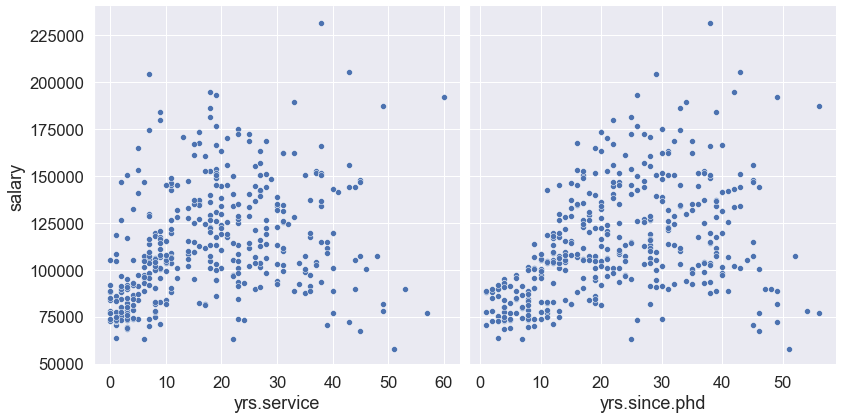

In [62]:
# plotting continuous independent variables against dependent variable
sns.set(font_scale=1.5)
sns.pairplot(data=df,
            y_vars=['salary'],
            x_vars=['yrs.service', 'yrs.since.phd'],
            height=6)

<Axes: >

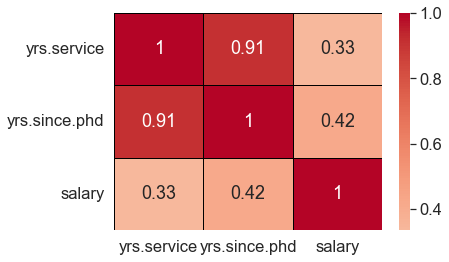

In [63]:
# correlation matrix
df_correlation = df[['yrs.service', 'yrs.since.phd', 'salary']]
sns.heatmap(df_correlation.corr(),
           annot=True,
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black')

Since yrs.service and yrs.since.phd are very correlated,
we will use only one of them, the one with better
correlation with salary, i.e. yrs.since.phd

In [64]:
# Categorical values
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [65]:
df.select_dtypes(include='object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [66]:
# for loop categorical values
categories = list(df.select_dtypes(include='object'))
for category in categories:
    print(df[category].value_counts())
    print('-----------------------------')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
-----------------------------
B    216
A    181
Name: discipline, dtype: int64
-----------------------------
Male      358
Female     39
Name: sex, dtype: int64
-----------------------------


In [67]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [68]:
# transformation of categorical values into dummies
df = pd.get_dummies(data=df, drop_first=True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


# Multilinear regression preparation

In [69]:
# isolate X and Y
y = df['salary'] / 1000
X = df.drop(columns=['salary', 'yrs.service'])

In [70]:
# add a const
X = sm.add_constant(data=X)

In [71]:
X.head(2)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1


In [76]:
# Training and Testing dataset
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [78]:
X_train.head(2)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1


# Multilinear Regression

In [79]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           1.65e-41
Time:                        17:12:15   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735